In [2]:
import os
import numpy as np
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt
import csv
from tslearn.metrics import *

In [3]:
test_files_path = "all_csv_files_Basic_Motions/Test"
train_files_path = "all_csv_files_Basic_Motions/Train"

In [4]:
csv_files_test = os.listdir(test_files_path)
csv_files_train = os.listdir(train_files_path)
len(csv_files_test), len(csv_files_train)

(40, 40)

In [5]:
df = pd.read_csv(os.path.join(train_files_path, csv_files_train[0]), usecols = ["dim_0", "dim_1", "dim_2", "dim_3", "dim_4", "dim_5"])
df

,dim_0,dim_1,dim_2,dim_3,dim_4,dim_5
0,0.079106,0.394032,0.551444,0.351565,0.023970,0.633883
1,0.079106,0.394032,0.551444,0.351565,0.023970,0.633883
2,-0.903497,-3.666397,-0.282844,-0.095881,-0.319605,0.972131
3,1.116125,-0.656101,0.333118,1.624657,-0.569962,1.209171
4,1.638200,1.405135,0.393875,1.187864,-0.271664,1.739182
...,...,...,...,...,...,...
95,-0.167918,0.224085,0.039889,0.039951,-0.010653,-0.021307
96,-0.227670,0.118392,-0.088594,-0.029297,0.005327,-0.042614
97,-0.193271,0.055227,-0.041530,0.000000,-0.013317,-0.063921
98,-0.193271,0.055227,-0.041530,0.000000,-0.013317,-0.063921


Text(0.5, 0, 'time')

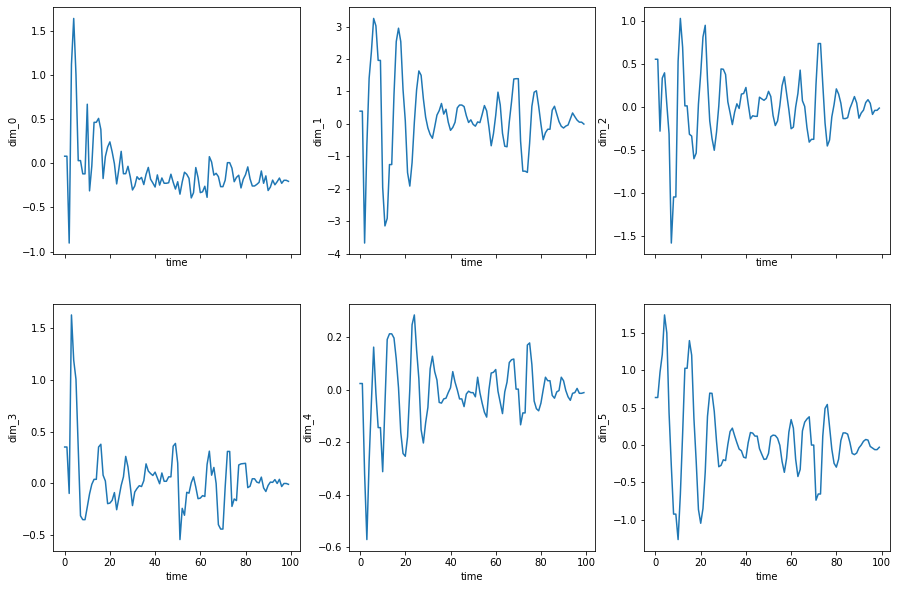

In [6]:
fig, ax = plt.subplots(nrows = 2, ncols = 3, figsize=(15, 10), sharex = True)
ax[0, 0].plot(df.values[:, 0])
ax[0, 0].set_ylabel("dim_0")
ax[0, 0].set_xlabel("time")

ax[0, 1].plot(df.values[:, 1])
ax[0, 1].set_ylabel("dim_1")
ax[0, 1].set_xlabel("time")

ax[0, 2].plot(df.values[:, 2])
ax[0, 2].set_ylabel("dim_2")
ax[0, 2].set_xlabel("time")

ax[1, 0].plot(df.values[:, 3])
ax[1, 0].set_ylabel("dim_3")
ax[1, 0].set_xlabel("time")

ax[1, 1].plot(df.values[:, 4])
ax[1, 1].set_ylabel("dim_4")
ax[1, 1].set_xlabel("time")

ax[1, 2].plot(df.values[:, 5])
ax[1, 2].set_ylabel("dim_5")
ax[1, 2].set_xlabel("time")


In [7]:
cost_csv = "cost.csv"

In [8]:
with open(cost_csv, mode = "w") as file:
    writer = csv.writer(file, delimiter = ",")
    temp = ["cost"]
    for csv_file_train in csv_files_train:
        temp.append(csv_file_train)
    writer.writerow(temp)
    
    for csv_file_test in csv_files_test:
        csv_file_test_path = os.path.join(test_files_path, csv_file_test)
        df_test = pd.read_csv(csv_file_test_path, delimiter = ",")
        ts_test = np.array(df_test.iloc[:, 1:], dtype = "float")
        
        costs = []
        
        for csv_file_train in csv_files_train:
            csv_file_train_path = os.path.join(train_files_path, csv_file_train)
            df_train = pd.read_csv(csv_file_train_path, delimiter = ",")
            ts_train = np.array(df_train.iloc[:, 1:], dtype = "float")
            costs.append(dtw(ts_test, ts_train))
        
        temp_array = [csv_file_test]
        for cost in costs:
            temp_array.append(cost)
        writer.writerow(temp_array)


In [9]:
cost_df = pd.read_csv(cost_csv)
xx = cost_df.values[:, :]
no_classes = 4
nos = int(xx.shape[0]/no_classes)

'''
kNN implementation
'''


k = range(3, 10, 2)
for K in k:
    print('k = ', K)
    cf = np.zeros((no_classes, no_classes))
    
    for i in range(xx.shape[0]):
        
        trueLabel = int(xx[i,0].split('.')[0][-1])-1
        # print(xx[i,0], trueLabel)
        arr1 = xx[i, 1:]
        arr2 = np.hstack((np.ones(nos), 2*np.ones(nos)))
        for j in range(1, no_classes-1, 1):
            if(no_classes>2):
                arr2 = np.hstack((arr2, (j+2)*np.ones(nos)))
        
        arr = np.vstack((arr1, arr2)).T
        
        for j in range(len(arr)):
            for kk in range(0, len(arr)-j-1):
                if(arr[kk, 0] > arr[kk+1, 0]):
                    arr[kk, 0], arr[kk+1, 0] = arr[kk+1, 0], arr[kk, 0]
                    arr[kk, 1], arr[kk+1, 1] = arr[kk+1, 1], arr[kk, 1]
        
        arr_K = arr[:K, :]
        label = np.zeros(no_classes, dtype = 'int')
        for aa in range(K):
            label[int(arr_K[aa,1]-1)]+=1
        
        computedLabel = np.argmax(label)
            
        cf[trueLabel, np.argmax(label)]+=1
    print('cf = \n', cf, '\nacc = ', 100*np.trace(cf)/xx.shape[0], "\n\n")



k =  3
cf = 
 [[10.  0.  0.  0.]
 [ 0. 10.  0.  0.]
 [ 0.  0. 10.  0.]
 [ 0.  0.  6.  4.]] 
acc =  85.0 


k =  5
cf = 
 [[10.  0.  0.  0.]
 [ 0. 10.  0.  0.]
 [ 0.  0. 10.  0.]
 [ 0.  0.  9.  1.]] 
acc =  77.5 


k =  7
cf = 
 [[10.  0.  0.  0.]
 [ 0. 10.  0.  0.]
 [ 0.  0. 10.  0.]
 [ 0.  0.  9.  1.]] 
acc =  77.5 


k =  9
cf = 
 [[10.  0.  0.  0.]
 [ 0. 10.  0.  0.]
 [ 0.  0. 10.  0.]
 [ 0.  0. 10.  0.]] 
acc =  75.0 


